Software is free software released under the "GNU General Public License v3.0"

Copyright (c) 2022 Yuning-Jiang - yuning.jiang17@gmail.com

In [5]:
import pandas as pd, numpy as np
import config
import re 
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Generate combined historical dataset using NVD reports from 2002 to 2020.
def generate_CVSSV2_CombinedFile():
    list = listdir(config.report_CVSSV2_path)
    number_files = len(list)-1
    dict = []
    dict_of_reports = {}
    for year in range(2002,2002 + number_files):
        year_in_string = str(year)
        fileName = 'NVD_'+ year_in_string + '_CVSSV2_train.csv'
        dict_of_reports[year_in_string] = []
        dict_of_reports[year_in_string] = pd.read_csv(config.report_CVSSV2_path + fileName)
        dict.append(dict_of_reports[year_in_string])
    df = pd.concat(dict, ignore_index=True)
    return df

df = generate_CVSSV2_CombinedFile()
df = df[~df['Report'].str.contains('REJECT')]
# print schema
print("Schema:\n\n",df.dtypes)
print("Number of vulnerability reports,columns=",df.shape)

Schema:

 CVE_ID                    object
PublishTime               object
ModifyTime                object
Report                    object
CVSSV2                   float64
AccessVector              object
AccessComplexity          object
Authentication            object
ConfidentialityImpact     object
IntegrityImpact           object
AvailabilityImpact        object
dtype: object
Number of vulnerability reports,columns= (150526, 11)


In [22]:
# Create a new column to show index year.
df['IndexYear'] = df["PublishTime"].apply(lambda x: ([x.strip() for x in re.compile(r"-").split(x[:])])[0])

In [23]:
df.sample(2)

,CVE_ID,PublishTime,ModifyTime,Report,CVSSV2,AccessVector,AccessComplexity,Authentication,ConfidentialityImpact,IntegrityImpact,AvailabilityImpact,IndexYear
4024,CVE-2001-1293,2001-09-26T04:00Z,2008-09-10T19:10Z,Buffer overflow in web server of 3com HomeConn...,5.0,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,2001
21154,CVE-2006-5933,2006-11-16T00:07Z,2018-10-17T21:46Z,SQL injection vulnerability in update.asp in U...,7.5,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,2006


Text(0.5, 1.0, 'Total Vulnerability Instances (2000-2021) With Different CVSS Version2 Score')

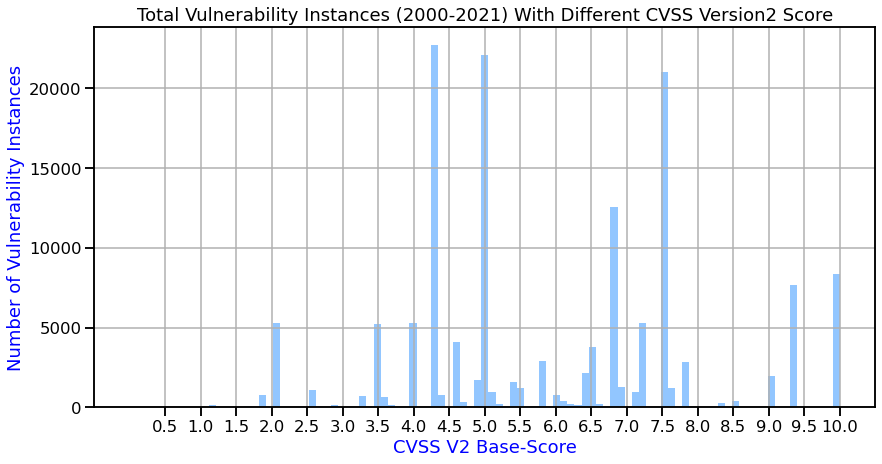

In [19]:
fig, ax = plt.subplots(figsize=(14,7))
bins = np.linspace(0, 10, 100)
y1=df['CVSSV2']
plt.hist(y1,bins, histtype='bar')
plt.style.use('seaborn-pastel')
plt.xlabel('CVSS V2 Base-Score',color='b')
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.xticks(rotation=0)
#special = [i for i in range(0,11)]
#idx = np.asarray([i for i in range(len(special))])
#plt.xticks(idx,special)
plt.xticks(np.arange(0.5, 10.5, step=0.5))
plt.grid(True)
sns.set_context('talk')
plt.title('Total Vulnerability Instances (2000-2021) With Different CVSS Version2 Score')

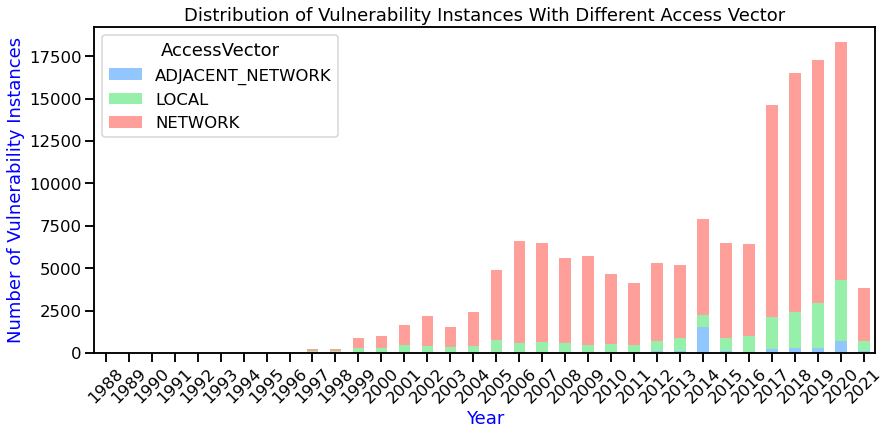

In [34]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby(['IndexYear','AccessVector']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
plt.xlabel('Year',color='b')
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.title('Distribution of Vulnerability Instances With Different Access Vector')
plt.xticks(rotation=45)
sns.set_context('talk')

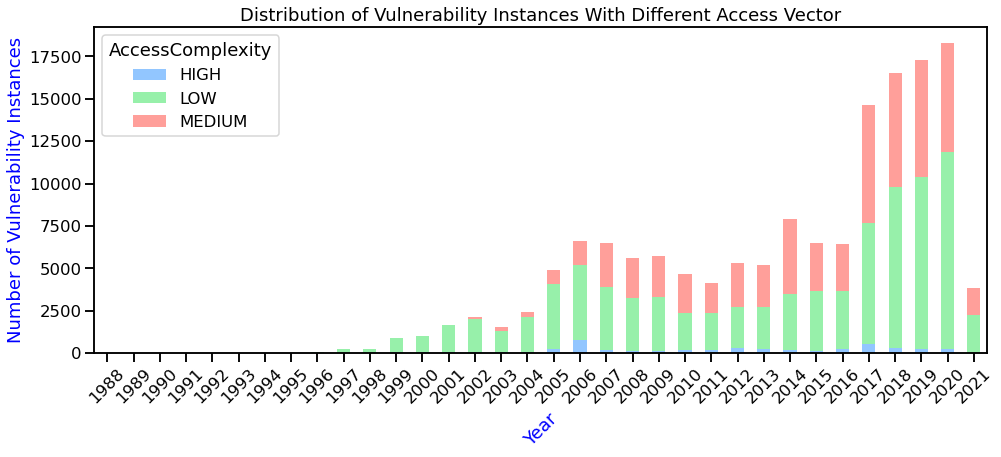

In [28]:
fig, ax = plt.subplots(figsize=(16,6))
df.groupby(['IndexYear','AccessComplexity']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
plt.xlabel('Year',color='b',rotation=45)
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.title('Distribution of Vulnerability Instances With Different Access Vector')
plt.xticks(rotation=45)
sns.set_context('talk')

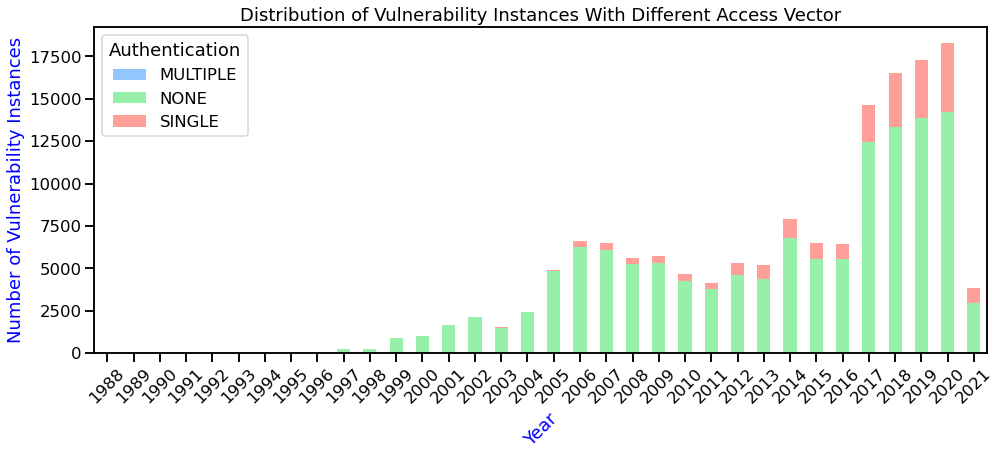

In [29]:
fig, ax = plt.subplots(figsize=(16,6))
df.groupby(['IndexYear','Authentication']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
plt.xlabel('Year',color='b',rotation=45)
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.title('Distribution of Vulnerability Instances With Different Access Vector')
plt.xticks(rotation=45)
sns.set_context('talk')

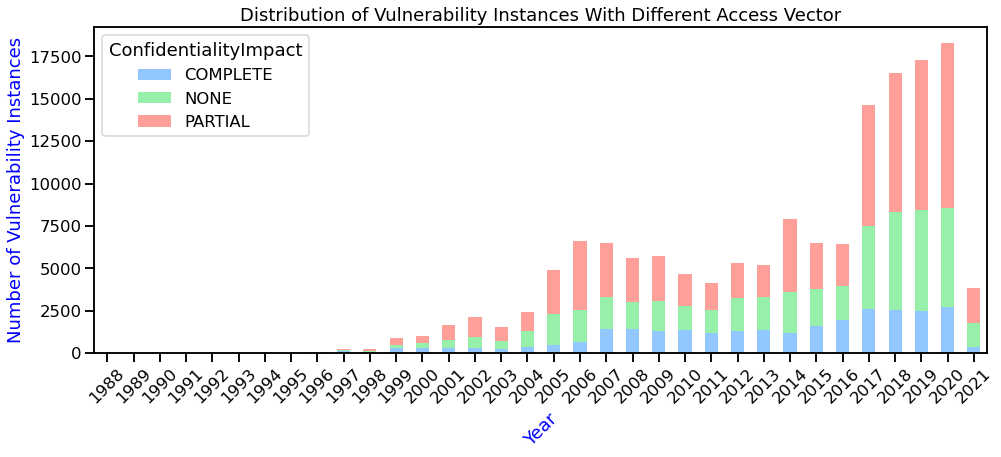

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
df.groupby(['IndexYear','ConfidentialityImpact']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
plt.xlabel('Year',color='b',rotation=45)
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.title('Distribution of Vulnerability Instances With Different Access Vector')
plt.xticks(rotation=45)
sns.set_context('talk')

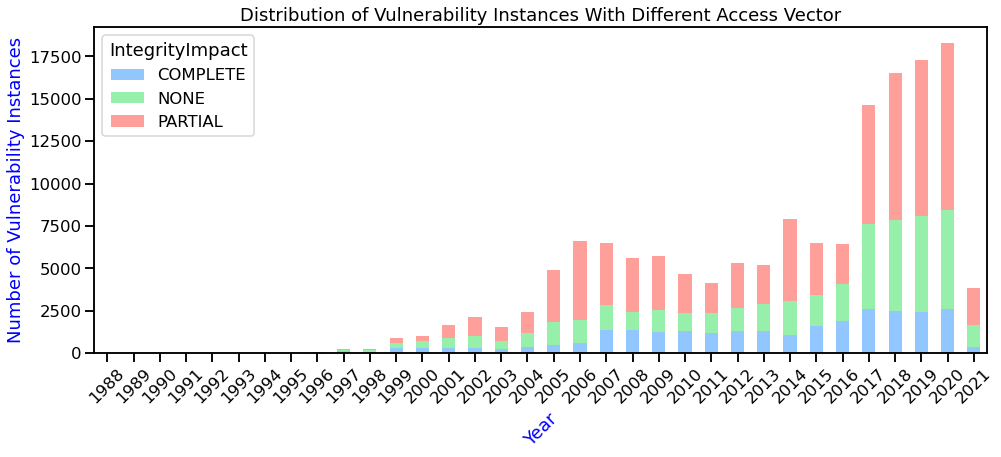

In [31]:
fig, ax = plt.subplots(figsize=(16,6))
df.groupby(['IndexYear','IntegrityImpact']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
plt.xlabel('Year',color='b',rotation=45)
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.title('Distribution of Vulnerability Instances With Different Access Vector')
plt.xticks(rotation=45)
sns.set_context('talk')

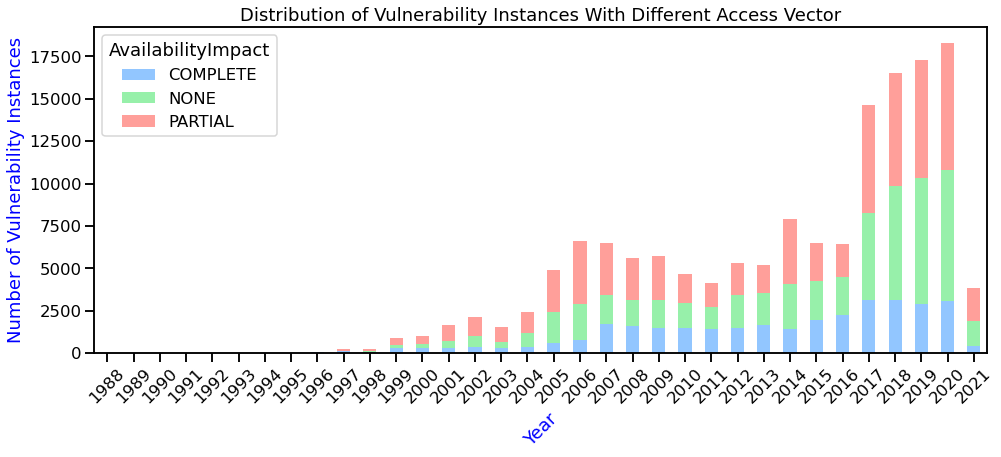

In [32]:
fig, ax = plt.subplots(figsize=(16,6))
df.groupby(['IndexYear','AvailabilityImpact']).size().unstack().plot(kind='bar',stacked=True,ax=ax)
plt.xlabel('Year',color='b',rotation=45)
plt.ylabel('Number of Vulnerability Instances',color='b')
plt.title('Distribution of Vulnerability Instances With Different Access Vector')
plt.xticks(rotation=45)
sns.set_context('talk')